#Problem Identification
Our goal is to look at public tweets of Top 5 Mobile Manufacturers around the world and note people's sentiments about the products. We analyze the major positive points and major drawbacks of their mobiles and how the companies can collect these analyize to improve their performance in their future Mobile instruments.

Data Collection and Cleaning
We have collected nearly 10,000 each of recents tweets of public about the top five selling mobile manufacturer Apple, Samsung, Oppo, Hauwei and Xiaomi. This notebook goes through a necessary step of any data science project - data cleaning. Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out". Feeding dirty data into a model will give us results that are meaningless.
Specifically, we'll be walking through:

*Getting the data - *in this case, we'll are fetching the data from Twitter API *Cleaning the data - *we will walk through popular text pre-processing techniques *Organizing the data - *we will organize the cleaned data into a way that is easy to input into other algorithms

# Importing Libraries
Import Textblob, which is a Lexicon-based sentiment analyzer It has some predefined rules or we can say word and weight dictionary, where it has some scores that help to calculate a sentence's polarity.
Import Twepy, which is an open source Python package that gives us a very convenient way to access the Twitter API.
Import Sys, which provides information about constants, functions and methods of the Python interpreter. dir(system) gives a summary of the available constants, functions and methods. Another possibility is the help() function. Using help(sys) provides valuable detail information.
Import AuthHandler which allows authorisation to the twitter data.
Import requests which allows us to send HTTP requests using Python. 

In [124]:
from textblob import TextBlob
import tweepy
import sys
#from tweepy.auth import AuthHandler
import requests

Import Pandas as pd: Import pandas portion of the code tells Python to bring the pandas data analysis library into your current environment. The as pd portion of the code then tells Python to give pandas the alias of pd.
Import re: The re module provides a set of powerful regular expression facilities, which allows you to quickly check whether a given string matches a given pattern.
Import Sys, which provides information about constants, functions and methods of the Python interpreter. dir(system) gives a summary of the available constants, functions and methods. Another possibility is the help() function. Using help(sys) provides valuable detail information.
Import AuthHandler which allows authorisation to the twitter data.
import requests which allows us to send HTTP requests using Python.

In [125]:
import pandas as pd
import pickle
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from numpy.ma.core import count

###This is the user and Twiter API authorisation information that we use to access the tweets.

Use Twitter API key and other details from your Twitter developer's account if you want to fetch new tweets. Or you can use the code as it is and fetch the tweets from pickle files. 

In [126]:
#APIKey = ''
#APIKeySecret = ''
#BearerToken = ''
#AccessToken = ''
#AccessTokenSecret = ''
#ClientID = ''
#ClientSecret = ''

In [127]:
#authenticationHandler = tweepy.OAuthHandler(consumer_key=APIKey, consumer_secret= APIKeySecret,callback=None)
#authenticationHandler.set_access_token(AccessToken,AccessTokenSecret)
#twitterAPI=tweepy.API(authenticationHandler,wait_on_rate_limit=True,)

#try:
#    redirect_url = authenticationHandler.get_authorization_url()
#except tweepy.TweepError:
#    print('Error! Failed to get request token.')


### Authenticating Twitter Credentials

In [128]:
#try:
#    twitterAPI.verify_credentials()
#    print("Authentication OK")
#except:
#    print("Error during authentication")

### Now lets select 5 search topic for the 5 Mobile Manufacturers on Twiitter and using Tweepy crusor, get the data 

In [129]:
searchTopic1= 'iphone'
searchTopic2= 'samsung galaxy'
searchTopic3= 'huawei phone'
searchTopic4= 'xiaomi'
searchTopic5= 'Oppo'
tweetsToLoad=10000
#tweetsIphone=tweepy.Cursor(twitterAPI.search,q=searchTopic1,lang='en', tweet_mode='extended').items(tweetsToLoad)
#tweetsSamsung=tweepy.Cursor(twitterAPI.search,q=searchTopic2,lang='en', tweet_mode='extended').items(tweetsToLoad)
#tweetsHuawei=tweepy.Cursor(twitterAPI.search,q=searchTopic3,lang='en', tweet_mode='extended').items(tweetsToLoad)
#tweetsXiaomi=tweepy.Cursor(twitterAPI.search,q=searchTopic4,lang='en', tweet_mode='extended').items(tweetsToLoad)
#tweetsOppo=tweepy.Cursor(twitterAPI.search,q=searchTopic5,lang='en', tweet_mode='extended').items(tweetsToLoad)

In [130]:
#tweets=tweepy.Cursor(twitterAPI.user_timeline,id='SumitRaju_',lang='en').items()

### Creating a new and empty data frame with 6 columns

In [131]:
TweetsDfIphone = pd.DataFrame(columns=['tweets','tweets_clean','location','handle_name','date_posted','length'])
TweetsDfSamsung = pd.DataFrame(columns=['tweets','tweets_clean','location','handle_name','date_posted','length'])
TweetsDfHuawei = pd.DataFrame(columns=['tweets','tweets_clean','location','handle_name','date_posted','length'])
TweetsDfXiaomi = pd.DataFrame(columns=['tweets','tweets_clean','location','handle_name','date_posted','length'])
TweetsDfOppo = pd.DataFrame(columns=['tweets','tweets_clean','location','handle_name','date_posted','length'])

# Cleaning the Data
Cleaning The Data
When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

Common data cleaning steps on all text:

*   Make text all lower case
*   Remove punctuation
*   Remove numerical values
*   Remove common non-sensical text (/n)
*   Remove Emojis, symbols, transportation & map symbols, flags
*   Tokenize text
*   Remove stop words

More data cleaning steps after tokenization:

Stemming / lemmatization
Parts of speech tagging
Create bi-grams or tri-grams
Deal with typos
And more...


In [132]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [133]:
def cleaning_mentions(data):
    return re.sub('@[^\s]+',' ',data)

In [134]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

## Organizing the Data
The output of this notebook will be clean and organized data in two standard text formats:

*Corpus - *a collection of text
*Document-Term Matrix - *word counts in matrix format

*   We are calling function, we created above inside the *getTweet* function



In [135]:
def getTweets(tweets,targetDf):
  global TweetsDfIphone, TweetsDfSamsung, TweetsDfHuawei, TweetsDfXiaomi, TweetsDfOppo
  for tweet in tweets:
    tweetText=tweet.full_text
    if tweetText.startswith('RT'):
      position=tweetText.index('RT')
      tweetText=tweetText[position+3:]
    removeEmojiText=remove_emojis(tweetText)
    cleanMentionsText=cleaning_mentions(removeEmojiText)
    cleanURLsText=cleaning_URLs(cleanMentionsText)
    if targetDf == 'TweetsDfIphone':
      TweetsDfIphone = TweetsDfIphone.append({'tweets': tweetText,'tweets_clean':cleanURLsText,'location':tweet.author.location,'handle_name':tweet.author.screen_name,'date_posted':tweet.created_at,'length':len(cleanURLsText)}, ignore_index=True)
    if targetDf == 'TweetsDfSamsung':
      TweetsDfSamsung = TweetsDfSamsung.append({'tweets': tweetText,'tweets_clean':cleanURLsText,'location':tweet.author.location,'handle_name':tweet.author.screen_name,'date_posted':tweet.created_at,'length':len(cleanURLsText)}, ignore_index=True)
    if targetDf == 'TweetsDfHuawei':
      TweetsDfHuawei = TweetsDfHuawei.append({'tweets': tweetText,'tweets_clean':cleanURLsText,'location':tweet.author.location,'handle_name':tweet.author.screen_name,'date_posted':tweet.created_at,'length':len(cleanURLsText)}, ignore_index=True)
    if targetDf == 'TweetsDfXiaomi':
      TweetsDfXiaomi = TweetsDfXiaomi.append({'tweets': tweetText,'tweets_clean':cleanURLsText,'location':tweet.author.location,'handle_name':tweet.author.screen_name,'date_posted':tweet.created_at,'length':len(cleanURLsText)}, ignore_index=True)
    if targetDf == 'TweetsDfOppo':
      TweetsDfOppo = TweetsDfOppo.append({'tweets': tweetText,'tweets_clean':cleanURLsText,'location':tweet.author.location,'handle_name':tweet.author.screen_name,'date_posted':tweet.created_at,'length':len(cleanURLsText)}, ignore_index=True)
    #analysis=TextBlob(tweetText)

### Calling functions to fetch tweets to each manufacturer

In [136]:
#getTweets(tweetsIphone,'TweetsDfIphone')

In [137]:
#getTweets(tweetsSamsung,'TweetsDfSamsung')

In [138]:
#getTweets(tweetsHuawei,'TweetsDfHuawei')

In [139]:
#getTweets(tweetsXiaomi,'TweetsDfXiaomi')

In [140]:
#getTweets(tweetsOppo,'TweetsDfOppo')

#### Looked at some of the Samsung Tweets

In [141]:
pd.set_option("display.max_colwidth", None)
TweetsDfSamsung.head()

,tweets,tweets_clean,location,handle_name,date_posted,length


In [142]:
#def get_user_details(username):
#        userobj = twitterAPI.get_user(username)
#        return userobj
#

#if __name__ == '__main__':
#    username = 'SumitRaju_'
#    userOBJ = get_user_details(username)
#    print(userOBJ.location)

### We are using this to store tweets to pickle files, when we fetched using twitter API

In [143]:
# Make a new directory to hold the text files
import os
os.makedirs("tweets", exist_ok=True)

In [144]:
def dump_pickel_files():
  # Pickle files for later use

  with open("tweets/rowTweetsIphone.txt", "wb") as file:
    pickle.dump(TweetsDfIphone, file)

  with open("tweets/rowTweetsSamsung.txt", "wb") as file:
    pickle.dump(TweetsDfSamsung, file)

  with open("tweets/rowTweetsHuawei.txt", "wb") as file:
    pickle.dump(TweetsDfHuawei, file)

  with open("tweets/rowTweetsXiaomi.txt", "wb") as file:
    pickle.dump(TweetsDfXiaomi, file)

  with open("tweets/rowTweetsOppo.txt", "wb") as file:
    pickle.dump(TweetsDfOppo, file)

In [145]:
#dump_pickel_files()

### Fetching Tweets from twitter API takes longer time as there are nearly 50,000 tweets. 
So we have saved these tweets in pickle files and stored in Github.
#### Getting object data from Github.

In [146]:
!wget -N "https://raw.githubusercontent.com/sumitraju/BA2-Class/main/nlp_twitter_sentiment_analysis/data/rowTweetsIphone.txt" -P "/content/tweets"
!wget -N "https://raw.githubusercontent.com/sumitraju/BA2-Class/main/nlp_twitter_sentiment_analysis/data/rowTweetsSamsung.txt" -P "/content/tweets"
!wget -N "https://raw.githubusercontent.com/sumitraju/BA2-Class/main/nlp_twitter_sentiment_analysis/data/rowTweetsHuawei.txt" -P "/content/tweets"
!wget -N "https://raw.githubusercontent.com/sumitraju/BA2-Class/main/nlp_twitter_sentiment_analysis/data/rowTweetsXiaomi.txt" -P "/content/tweets"
!wget -N "https://raw.githubusercontent.com/sumitraju/BA2-Class/main/nlp_twitter_sentiment_analysis/data/rowTweetsOppo.txt" -P "/content/tweets"

--2022-09-25 00:57:24--  https://raw.githubusercontent.com/sumitraju/BA2-Class/main/nlp_twitter_sentiment_analysis/data/rowTweetsIphone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-09-25 00:57:24 ERROR 404: Not Found.

--2022-09-25 00:57:24--  https://raw.githubusercontent.com/sumitraju/BA2-Class/main/nlp_twitter_sentiment_analysis/data/rowTweetsSamsung.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-09-25 00:57:24 ERROR 404: Not Found.

--2022-09-25 00:57:24--  https://raw.githubusercontent.com/sumitraju/BA2-Cl

### Loading pickle data to pandas data frame

In [147]:
def load_pickle_main():
  # Load pickled files
  global TweetsDfIphone, TweetsDfSamsung, TweetsDfHuawei, TweetsDfXiaomi, TweetsDfOppo
  with open("tweets/rowTweetsIphone.txt", "rb") as file:
    TweetsDfIphone = pickle.load(file)
  with open("tweets/rowTweetsSamsung.txt", "rb") as file:
    TweetsDfSamsung = pickle.load(file)
  with open("tweets/rowTweetsHuawei.txt", "rb") as file:
    TweetsDfHuawei = pickle.load(file)
  with open("tweets/rowTweetsXiaomi.txt", "rb") as file:
    TweetsDfXiaomi = pickle.load(file)
  with open("tweets/rowTweetsOppo.txt", "rb") as file:
    TweetsDfOppo = pickle.load(file)

In [148]:
load_pickle_main()



#### Checking the Shape 
We checked the number of tweets which are in rows ( around 10,000) and number of column (6).

In [149]:
TweetsDfIphone.shape

(10000, 6)

In [150]:
TweetsDfSamsung.shape

(7750, 6)

In [151]:
TweetsDfHuawei.shape

(10000, 6)

In [152]:
TweetsDfXiaomi.shape

(10000, 6)

In [153]:
TweetsDfOppo.shape

(10000, 6)

In [33]:
pd.set_option('max_colwidth',130)
#TweetsDfIphone.columns = ['tweets','tweets_clean','location','handle_name','date_posted','length']
#TweetsDfIphone = TweetsDfIphone.sort_index()

##### Checking the First Tweet

In [34]:
print(TweetsDfIphone['tweets'][1])

@missufe: $1000 | 14 JT RUPIAH OR IPHONE 12 PRO FOR ONE WINNER IN 7 DAYS 🦄

- RT &amp; Follow

@withNabiya 
@metarabbitclub 
@GrumpyBearTC…


### Creating a fresh copy of all the data frames

In [35]:
TweetsDfIphoneClean=TweetsDfIphone.copy()
TweetsDfSamsungClean=TweetsDfSamsung.copy()
TweetsDfHuaweiClean=TweetsDfHuawei.copy()
TweetsDfXiaomiClean=TweetsDfXiaomi.copy()
TweetsDfOppoClean=TweetsDfOppo.copy()

# Exploratory Data Analysis
After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each tweets set:

Most common words - find these and create word clouds
Size of vocabulary - Length of the tweets
Amount of profanity - most common terms

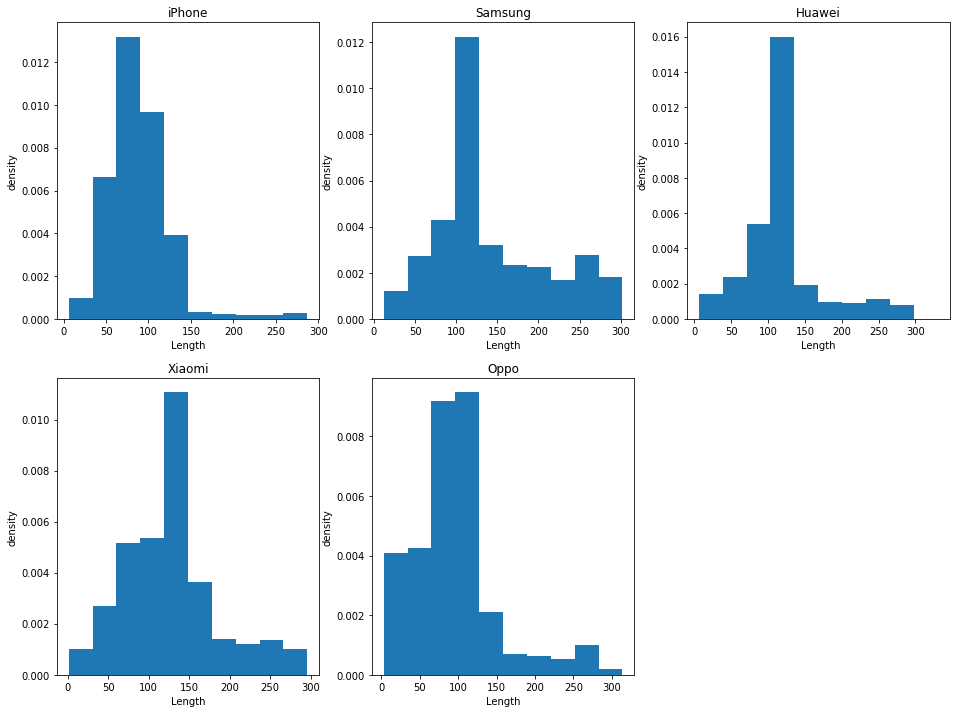

In [36]:
plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
plt.hist(TweetsDfIphoneClean['length'], density=True, bins=10)  # density=False would make counts
plt.ylabel('density')
plt.xlabel('Length')
plt.title('iPhone')

plt.subplot(2,3,2)
plt.hist(TweetsDfSamsungClean['length'], density=True, bins=10)  # density=False would make counts
plt.ylabel('density')
plt.xlabel('Length')
plt.title('Samsung')

plt.subplot(2,3,3)
plt.hist(TweetsDfHuaweiClean['length'], density=True, bins=10)  # density=False would make counts
plt.ylabel('density')
plt.xlabel('Length')
plt.title('Huawei')

plt.subplot(2,3,4)
plt.hist(TweetsDfXiaomiClean['length'], density=True, bins=10)  # density=False would make counts
plt.ylabel('density')
plt.xlabel('Length')
plt.title('Xiaomi')

plt.subplot(2,3,5)
plt.hist(TweetsDfOppoClean['length'], density=True, bins=10)  # density=False would make counts
plt.ylabel('density')
plt.xlabel('Length')
plt.title('Oppo')
plt.show()


We find that the majority of tweets has a word length of 75 to 100  in case of Iphone.
Samsung has around of 125 word length and density is very high.
Other manufacturer though the word length are higher, but have lower density.
This implies that people tweeting on Iphone and Samsung usually use lower word length whereas the tweets on other mobile manufacturer have a more higher word length.  

### Some more cleaning on Data 
For removal of additional punctuations and non-sensical texts which were missed in earlier cleaning

In [37]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [38]:
TweetsDfIphoneClean['tweets_clean'] = TweetsDfIphoneClean['tweets_clean'].apply(lambda x: cleaning_numbers(x))
TweetsDfSamsungClean['tweets_clean'] = TweetsDfSamsungClean['tweets_clean'].apply(lambda x: cleaning_numbers(x))
TweetsDfHuaweiClean['tweets_clean'] = TweetsDfHuaweiClean['tweets_clean'].apply(lambda x: cleaning_numbers(x))
TweetsDfXiaomiClean['tweets_clean'] = TweetsDfXiaomiClean['tweets_clean'].apply(lambda x: cleaning_numbers(x))
TweetsDfOppoClean['tweets_clean'] = TweetsDfOppoClean['tweets_clean'].apply(lambda x: cleaning_numbers(x))
#TweetsDfIphoneClean.head()

In [39]:
with open("tweets/cleanTweets.txt", "wb") as file:
  pickle.dump(TweetsDfIphoneClean, file)

# Load pickled files
with open("tweets/cleanTweets.txt", "rb") as file:
  TweetsDfIphoneClean = pickle.load(file)

In [40]:
# Removing quotes and changing to lower case
def cleaning_quotes(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = text.lower() #to lower case
    return text


In [41]:
# Let's take a look at the updated text
TweetsDfIphoneClean['tweets_clean'] = TweetsDfIphoneClean['tweets_clean'].apply(lambda x: cleaning_quotes(x))
TweetsDfSamsungClean['tweets_clean'] = TweetsDfSamsungClean['tweets_clean'].apply(lambda x: cleaning_quotes(x))
TweetsDfHuaweiClean['tweets_clean'] = TweetsDfHuaweiClean['tweets_clean'].apply(lambda x: cleaning_quotes(x))
TweetsDfXiaomiClean['tweets_clean'] = TweetsDfXiaomiClean['tweets_clean'].apply(lambda x: cleaning_quotes(x))
TweetsDfOppoClean['tweets_clean'] = TweetsDfOppoClean['tweets_clean'].apply(lambda x: cleaning_quotes(x))
#TweetsDfIphoneClean.head()

### Creating a new copy of data for Corpus

In [42]:
TweetsDfIphoneCorpus=TweetsDfIphoneClean.copy()
TweetsDfSamsungCorpus=TweetsDfSamsungClean.copy()
TweetsDfHuaweiCorpus=TweetsDfHuaweiClean.copy()
TweetsDfXiaomiCorpus=TweetsDfXiaomiClean.copy()
TweetsDfOppoCorpus=TweetsDfOppoClean.copy()

### removing repeat charcters

In [43]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [44]:
TweetsDfIphoneCorpus['tweets_clean'] = TweetsDfIphoneCorpus['tweets_clean'].apply(lambda x: cleaning_repeating_char(x))
TweetsDfSamsungCorpus['tweets_clean'] = TweetsDfSamsungCorpus['tweets_clean'].apply(lambda x: cleaning_repeating_char(x))
TweetsDfHuaweiCorpus['tweets_clean'] = TweetsDfHuaweiCorpus['tweets_clean'].apply(lambda x: cleaning_repeating_char(x))
TweetsDfXiaomiCorpus['tweets_clean'] = TweetsDfXiaomiCorpus['tweets_clean'].apply(lambda x: cleaning_repeating_char(x))
TweetsDfOppoCorpus['tweets_clean'] = TweetsDfOppoCorpus['tweets_clean'].apply(lambda x: cleaning_repeating_char(x))
#TweetsDfIphoneCorpus.head()

##### Removal of Stop Words
We import various libaries for identifing the stopwords, tokenizer, stemmer and lemmatizer.
Cleaning of data for all stopwords

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk.stem as stem
import nltk.corpus as corpus

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [46]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [48]:
TweetsDfIphoneCorpus['tweets_clean'] = TweetsDfIphoneCorpus['tweets_clean'].apply(lambda x: cleaning_punctuations(x))
TweetsDfSamsungCorpus['tweets_clean'] = TweetsDfSamsungCorpus['tweets_clean'].apply(lambda x: cleaning_punctuations(x))
TweetsDfHuaweiCorpus['tweets_clean'] = TweetsDfHuaweiCorpus['tweets_clean'].apply(lambda x: cleaning_punctuations(x))
TweetsDfXiaomiCorpus['tweets_clean'] = TweetsDfXiaomiCorpus['tweets_clean'].apply(lambda x: cleaning_punctuations(x))
TweetsDfOppoCorpus['tweets_clean'] = TweetsDfOppoCorpus['tweets_clean'].apply(lambda x: cleaning_punctuations(x))
TweetsDfIphoneCorpus.head()

,tweets,tweets_clean,location,handle_name,date_posted,length
0,@gemhostofficial: $1000 | 14 JY | IPHONE 12 ~ Ends in 10 days \n\n• RT &amp; Follow \n\n@ceirous ( 🔔 )\n@Nuggetz_io \n@giezwac...,jy iphone ends in days • rt amp follow,,Yenirbigwin25,2022-04-16 02:27:24,81
1,@missufe: $1000 | 14 JT RUPIAH OR IPHONE 12 PRO FOR ONE WINNER IN 7 DAYS 🦄\n\n- RT &amp; Follow\n\n@withNabiya \n@metarabbitcl...,jt rupiah or iphone pro for one winner in days rt amp follow,,_hopieeee09,2022-04-16 02:27:23,93
2,@gemhostofficial: $1000 | 14 JY | IPHONE 12 ~ ends in 10 days \n\n• RT &amp; Follow \n\n@reneeziv \n@TheOrcsNFT\n@Cryptoishaz ...,jy iphone ends in days • rt amp follow,,vilariannn,2022-04-16 02:27:23,80
3,"@missufe: $300 | 4,2 JT OR IPHONE 8 FOR ONE WINNER IN 48 HOURS 🦄\n\n- RT &amp; Follow\n\n@BHVannessa + @Ac7ionMann https://t.c...",jt or iphone for one winner in hours rt amp follow,"Manila City, National Capital",aaaldwinn,2022-04-16 02:27:23,83
4,@furrincrypto: $1000 | 14 JT | iPhone 12 Pro ~ 10 DAYS🖼️\n\n($500)\n-RT &amp; Follow @ORIGYNTech \n\n(+$500)\n-Join Telegram 👇...,jt iphone pro daysrt amp follow join telegram proof,Yoongi's,daddieagustd,2022-04-16 02:27:22,104


### Applying Stemming and Lemmatization

In [49]:
#Stemming and Lemmatization
add_stop_words = ['rt', 'jt', 'jy', 'amp']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

set(stopwords.words('english'))
def StemmingLemmatizationStopWords(Data):
  #stop_words = set(stopwords.words('english')) 
  no_stop_words = []
  no_stop_words_string=""
  for tweetsCleaned in Data:
    word_tokens = word_tokenize(tweetsCleaned)

      
    filtered_sentence = ""
    filtered_sentence_ar = [] 
      
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence = filtered_sentence + w + ' '
            filtered_sentence_ar.append(w) 

    Stem_words = []
    Stem_words_str=""

    ps =PorterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence_ar:
        if w.endswith('e'):
          rootWord=w
        else:
          rootWord=ps.stem(w)
        Stem_words.append(rootWord)
        Stem_words_str=Stem_words_str+rootWord+' '
    lemma_word = []
    lemma_word_str = ""
    for w in Stem_words:
      word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
      word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
      word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
      lemma_word.append(word3)
      lemma_word_str=lemma_word_str+word3+ ' '

    no_stop_words.append(lemma_word_str)
    no_stop_words_string = no_stop_words_string + lemma_word_str + ' '
    #print(Stem_words)
    #print(lemma_word)
    #print(filtered_sentence_ar)
  return no_stop_words, no_stop_words_string

In [51]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [52]:
no_stop_words_return_iphone = StemmingLemmatizationStopWords(TweetsDfIphoneCorpus['tweets_clean'])
no_stop_words_return_samsung = StemmingLemmatizationStopWords(TweetsDfSamsungCorpus['tweets_clean'])
no_stop_words_return_huawei = StemmingLemmatizationStopWords(TweetsDfHuaweiCorpus['tweets_clean'])
no_stop_words_return_xiaomi = StemmingLemmatizationStopWords(TweetsDfXiaomiCorpus['tweets_clean'])
no_stop_words_return_oppo = StemmingLemmatizationStopWords(TweetsDfOppoCorpus['tweets_clean'])

In [53]:
#no_stop_words_iphone = no_stop_words_return_iphone[0]
no_stop_words_string_iphone = no_stop_words_return_iphone[1]

#no_stop_words_samsung = no_stop_words_return_samsung[0]
no_stop_words_string_samsung = no_stop_words_return_samsung[1]

#no_stop_words_huawei = no_stop_words_return_huawei[0]
no_stop_words_string_huawei = no_stop_words_return_huawei[1]

#no_stop_words_xiaomi = no_stop_words_return_xiaomi[0]
no_stop_words_string_xiaomi = no_stop_words_return_xiaomi[1]

#no_stop_words_oppo = no_stop_words_return_oppo[0]
no_stop_words_string_oppo = no_stop_words_return_oppo[1]

In [54]:
#no_stop_words_iphone=pd.DataFrame(no_stop_words_iphone)
#no_stop_words_iphone.columns = ['tweets_clean']
#no_stop_words_iphone = no_stop_words_iphone.sort_index()
#no_stop_words_iphone.head()


### Creating one long string from all the tweets in each data frame

In [55]:
no_stop_words_string_copy_iphone=no_stop_words_string_iphone
no_stop_words_string_copy_samsung=no_stop_words_string_samsung
no_stop_words_string_copy_huawei=no_stop_words_string_huawei
no_stop_words_string_copy_xiaomi=no_stop_words_string_xiaomi
no_stop_words_string_copy_oppo=no_stop_words_string_oppo

In [56]:
no_stop_words_string_final=np.array([["iPhone",no_stop_words_string_copy_iphone]])
no_stop_words_string_final=pd.DataFrame(no_stop_words_string_final)
no_stop_words_string_final.columns = ['smartphone','tweets_clean']
no_stop_words_string_final = no_stop_words_string_final.sort_index()

In [57]:
no_stop_words_string_final = no_stop_words_string_final.append({'smartphone':'Samsung','tweets_clean':no_stop_words_string_copy_samsung},ignore_index=True)
no_stop_words_string_final = no_stop_words_string_final.append({'smartphone':'Huawei','tweets_clean':no_stop_words_string_copy_huawei},ignore_index=True)
no_stop_words_string_final = no_stop_words_string_final.append({'smartphone':'Xiaomi','tweets_clean':no_stop_words_string_copy_xiaomi},ignore_index=True)
no_stop_words_string_final = no_stop_words_string_final.append({'smartphone':'Oppo','tweets_clean':no_stop_words_string_copy_oppo},ignore_index=True)

Checking the data after stop words are removed

In [58]:
no_stop_words_string_final.head()

,smartphone,tweets_clean
0,iPhone,iphone end day • follow rupiah iphone pro winner day follow iphone end day • follow iphone winner hour follow iphone pro d...
1,Samsung,samsung new digit id wallet store document asnat idsdriv licensescredit cardsdi redmagicpro cureent use samsung v love play b...
2,Huawei,citi future support digit workforce provide citizen person experi improve th polar code basic ldpc code achieve capac slightl...
3,Xiaomi,redmi sale attribut contribut factor gain shipment rank redmi xiaomi like redmi phone everytime drôle phone si dont anymore p...
4,Oppo,ponder mysteri oppoeasteregg oppo taco proud kid oppo write histor fiction she crap market bad selfpromot need th oppo olso...


### Most Common Words


### Creating document-term matrix using CountVectorizer

In [59]:
#We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(no_stop_words_string_final.tweets_clean)
no_stop_words_string_CV = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
no_stop_words_string_CV.index = no_stop_words_string_final.smartphone
no_stop_words_string_CV

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaa,aaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh,aaaand,aaah,aaaq,aachi,aadmi,aaeasaaasaasaa,...,ላይ,ረሀብ,ተደርቦ,የሚያንገላታው,የቀድሞ,የዋግ,ጦርነት,ፃግብጅ,ᴥedit,⁰c
smartphone,,,,,,,,,,,,,,,,,,,,,
iPhone,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Samsung,0,8,2,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Huawei,1,0,0,0,0,0,1,0,0,0,...,2,2,2,2,2,2,2,2,0,0
Xiaomi,0,0,0,0,0,1,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Oppo,12,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Read in the document-term matrix

In [60]:
# Read in the document-term matrix
no_stop_words_string_CV = no_stop_words_string_CV.transpose()
no_stop_words_string_CV.head()

smartphone,iPhone,Samsung,Huawei,Xiaomi,Oppo
aa,0,0,1,0,12
aaa,1,8,0,0,1
aaaa,0,2,0,0,0
aaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh,1,0,0,0,0
aaaand,0,1,0,0,0


### Finding the Top 30 words from each data frame

In [61]:
# Find the top 30 words used
top_dict = {}
for c in no_stop_words_string_CV.columns:
    top = no_stop_words_string_CV[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'iPhone': [('iphone', 9269),
  ('follow', 6958),
  ('day', 4411),
  ('winner', 3062),
  ('plu', 2072),
  ('rupiah', 1868),
  ('pro', 1819),
  ('hour', 1807),
  ('end', 1586),
  ('giveaway', 614),
  ('retweet', 588),
  ('tag', 580),
  ('idriphone', 579),
  ('proof', 489),
  ('stand', 477),
  ('win', 465),
  ('question', 450),
  ('chance', 437),
  ('eye', 436),
  ('answer', 430),
  ('comment', 429),
  ('daili', 412),
  ('correctli', 408),
  ('post', 396),
  ('like', 295),
  ('time', 282),
  ('long', 272),
  ('stamp', 239),
  ('ukrainian', 233),
  ('just', 218)],
 'Samsung': [('phone', 8576),
  ('samsung', 6882),
  ('galaxi', 2200),
  ('new', 2119),
  ('use', 1235),
  ('mobile', 1062),
  ('iphone', 925),
  ('case', 890),
  ('world', 656),
  ('number', 625),
  ('buy', 592),
  ('unfold', 585),
  ('hesintoherseason', 583),
  ('kilig', 557),
  ('android', 545),
  ('chapter', 540),
  ('good', 515),
  ('like', 498),
  ('ultra', 465),
  ('im', 462),
  ('just', 458),
  ('screen', 415),
  ('need'

### Print the top 15 words mentioned in the Tweets

In [62]:
for phone, top_words in top_dict.items():
    print(phone)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

iPhone
iphone, follow, day, winner, plu, rupiah, pro, hour, end, giveaway, retweet, tag, idriphone, proof
---
Samsung
phone, samsung, galaxi, new, use, mobile, iphone, case, world, number, buy, unfold, hesintoherseason, kilig
---
Huawei
huawei, russia, app, store, compani, new, chinese, nova, support, online, china, phone, zea, giveaway
---
Xiaomi
xiaomi, pro, redmi, phone, mi, note, india, launch, summon, just, clickgtgt, make, jain, manu
---
Oppo
oppo, midnight, black, ae, oppoaeoppoaeoppoaeoppoae, wish, luck, oppoae, di, bismilah, hadiah, bulan, ramadhan, pro
---


#### Look at the most common top words --> add them to the stop word list

In [63]:
from collections import Counter

# Let's first pull out the top 30 words for each company
words = []
for phone in no_stop_words_string_CV.columns:
    top = [word for (word, count) in top_dict[phone]]
    for t in top:
        words.append(t)
        
words

['iphone',
 'follow',
 'day',
 'winner',
 'plu',
 'rupiah',
 'pro',
 'hour',
 'end',
 'giveaway',
 'retweet',
 'tag',
 'idriphone',
 'proof',
 'stand',
 'win',
 'question',
 'chance',
 'eye',
 'answer',
 'comment',
 'daili',
 'correctli',
 'post',
 'like',
 'time',
 'long',
 'stamp',
 'ukrainian',
 'just',
 'phone',
 'samsung',
 'galaxi',
 'new',
 'use',
 'mobile',
 'iphone',
 'case',
 'world',
 'number',
 'buy',
 'unfold',
 'hesintoherseason',
 'kilig',
 'android',
 'chapter',
 'good',
 'like',
 'ultra',
 'im',
 'just',
 'screen',
 'need',
 'know',
 'dont',
 'brand',
 'camera',
 'apple',
 'say',
 'day',
 'huawei',
 'russia',
 'app',
 'store',
 'compani',
 'new',
 'chinese',
 'nova',
 'support',
 'online',
 'china',
 'phone',
 'zea',
 'giveaway',
 'drop',
 'airtime',
 'offer',
 'bank',
 'wedomorewednesday',
 'use',
 'item',
 'fundus',
 'sanction',
 'win',
 'mir',
 'ericsson',
 'payment',
 'world',
 'mtn',
 'ban',
 'xiaomi',
 'pro',
 'redmi',
 'phone',
 'mi',
 'note',
 'india',
 'launch

In [64]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('just', 4),
 ('phone', 4),
 ('pro', 3),
 ('new', 3),
 ('use', 3),
 ('iphone', 2),
 ('day', 2),
 ('giveaway', 2),
 ('win', 2),
 ('like', 2),
 ('samsung', 2),
 ('world', 2),
 ('follow', 1),
 ('winner', 1),
 ('plu', 1),
 ('rupiah', 1),
 ('hour', 1),
 ('end', 1),
 ('retweet', 1),
 ('tag', 1),
 ('idriphone', 1),
 ('proof', 1),
 ('stand', 1),
 ('question', 1),
 ('chance', 1),
 ('eye', 1),
 ('answer', 1),
 ('comment', 1),
 ('daili', 1),
 ('correctli', 1),
 ('post', 1),
 ('time', 1),
 ('long', 1),
 ('stamp', 1),
 ('ukrainian', 1),
 ('galaxi', 1),
 ('mobile', 1),
 ('case', 1),
 ('number', 1),
 ('buy', 1),
 ('unfold', 1),
 ('hesintoherseason', 1),
 ('kilig', 1),
 ('android', 1),
 ('chapter', 1),
 ('good', 1),
 ('ultra', 1),
 ('im', 1),
 ('screen', 1),
 ('need', 1),
 ('know', 1),
 ('dont', 1),
 ('brand', 1),
 ('camera', 1),
 ('apple', 1),
 ('say', 1),
 ('huawei', 1),
 ('russia', 1),
 ('app', 1),
 ('store', 1),
 ('compani', 1),
 ('chinese', 1),
 ('nova', 1),
 ('support', 1),
 ('online', 1),
 ('c

NOTE: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

### Lets visualize the most common top words for each manufacturer using WorldCloud

In [65]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=no_stop_words_string_CV, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

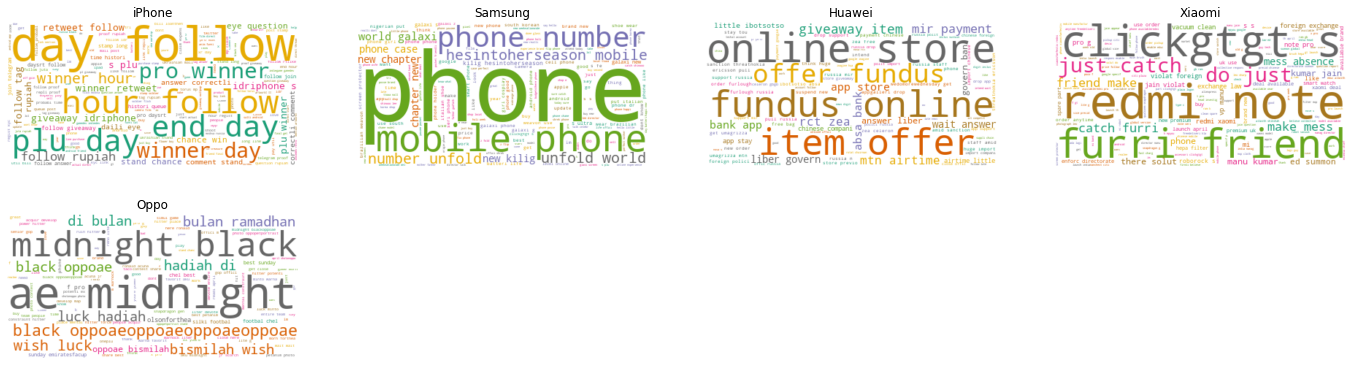

In [66]:
plt.rcParams['figure.figsize'] = [24, 10]

full_names = ['iPhone', 'Samsung','Huawei','Xiaomi','Oppo']

# Create subplots for each company
for index, phones in enumerate(no_stop_words_string_CV.columns):
    wc.generate(no_stop_words_string_final.tweets_clean[index])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()


*   For iPhone, the top words are **follow, day, winner,List item**.
*   or Samsung, the top words are **phone, galaxi, new**.
*   For huawei, the top words are russia, app, store.
*   For xiaomi, the top words are pro, redmi, phone.
*   For oppo, the top words are midnight, black, wish.



## polarity and subjectivity analysis.

In [67]:
# Create quick lambda functions to find the polarity and subjectivity.

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

no_stop_words_string_final['polarity'] = no_stop_words_string_final['tweets_clean'].apply(pol)
no_stop_words_string_final['subjectivity'] = no_stop_words_string_final['tweets_clean'].apply(sub)
no_stop_words_string_final.head()


,smartphone,tweets_clean,polarity,subjectivity
0,iPhone,iphone end day • follow rupiah iphone pro winner day follow iphone end day • follow iphone winner hour follow iphone pro d...,0.227906,0.492711
1,Samsung,samsung new digit id wallet store document asnat idsdriv licensescredit cardsdi redmagicpro cureent use samsung v love play b...,0.196584,0.510367
2,Huawei,citi future support digit workforce provide citizen person experi improve th polar code basic ldpc code achieve capac slightl...,0.143309,0.450411
3,Xiaomi,redmi sale attribut contribut factor gain shipment rank redmi xiaomi like redmi phone everytime drôle phone si dont anymore p...,0.142396,0.412862
4,Oppo,ponder mysteri oppoeasteregg oppo taco proud kid oppo write histor fiction she crap market bad selfpromot need th oppo olso...,0.080874,0.458664


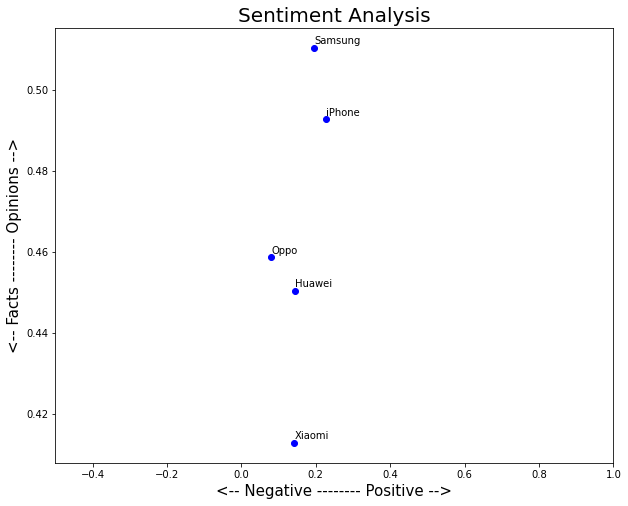

In [68]:
# Let's plot the results

plt.rcParams['figure.figsize'] = [10, 8]

for index, phones in enumerate(no_stop_words_string_final.index):
    x = no_stop_words_string_final.polarity.loc[index]
    y = no_stop_words_string_final.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, no_stop_words_string_final['smartphone'][index], fontsize=10)
    plt.xlim(-.5, 1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Samsung and Iphone tweets are opinion based where as Oppo, Huawei have neutral subjectivity, Xiaomi on the other hand is fact based.
It is seen that Chinese manufactured phones have less positive sensitivity, whereas Samsung and Iphone have higher positive sensitivity.

# Topic Modeling
##Introduction


Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do Latent Dirichlet Allocation (LDA), which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

In [69]:
# Import the necessary modules for LDA with gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [70]:
no_stop_words_string_CV

smartphone,iPhone,Samsung,Huawei,Xiaomi,Oppo
aa,0,0,1,0,12
aaa,1,8,0,0,1
aaaa,0,2,0,0,0
aaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh,1,0,0,0,0
aaaand,0,1,0,0,0
...,...,...,...,...,...
የዋግ,0,0,2,0,0
ጦርነት,0,0,2,0,0
ፃግብጅ,0,0,2,0,0
ᴥedit,0,0,0,0,1


In [71]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(no_stop_words_string_CV)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [72]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [73]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.039*"oppo" + 0.037*"xiaomi" + 0.013*"black" + 0.013*"midnight" + 0.013*"ae" + 0.010*"pro" + 0.008*"phone" + 0.007*"redmi" + 0.006*"oppoaeoppoaeoppoaeoppoae" + 0.006*"wish"'),
 (1,
  '0.036*"iphone" + 0.032*"phone" + 0.027*"huawei" + 0.026*"follow" + 0.025*"samsung" + 0.017*"day" + 0.011*"winner" + 0.011*"new" + 0.008*"pro" + 0.008*"plu"')]

In [74]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.129*"iphone" + 0.097*"follow" + 0.061*"day" + 0.042*"winner" + 0.029*"plu" + 0.026*"rupiah" + 0.025*"pro" + 0.025*"hour" + 0.022*"end" + 0.009*"giveaway"'),
 (1,
  '0.063*"huawei" + 0.013*"russia" + 0.010*"app" + 0.009*"store" + 0.007*"compani" + 0.007*"new" + 0.007*"chinese" + 0.006*"nova" + 0.005*"support" + 0.005*"online"'),
 (2,
  '0.032*"phone" + 0.027*"oppo" + 0.026*"xiaomi" + 0.024*"samsung" + 0.009*"new" + 0.009*"black" + 0.009*"midnight" + 0.009*"ae" + 0.008*"pro" + 0.007*"galaxi"')]

In [75]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.060*"iphone" + 0.051*"phone" + 0.041*"follow" + 0.041*"samsung" + 0.028*"day" + 0.018*"winner" + 0.013*"new" + 0.013*"plu" + 0.013*"galaxi" + 0.012*"pro"'),
 (1,
  '0.089*"oppo" + 0.030*"midnight" + 0.029*"black" + 0.029*"ae" + 0.014*"oppoaeoppoaeoppoaeoppoae" + 0.013*"wish" + 0.013*"luck" + 0.012*"oppoae" + 0.012*"di" + 0.012*"bismilah"'),
 (2,
  '0.065*"huawei" + 0.013*"russia" + 0.010*"app" + 0.009*"store" + 0.008*"compani" + 0.007*"new" + 0.007*"chinese" + 0.006*"nova" + 0.006*"support" + 0.005*"online"'),
 (3,
  '0.064*"xiaomi" + 0.013*"pro" + 0.012*"redmi" + 0.010*"phone" + 0.009*"mi" + 0.009*"note" + 0.007*"india" + 0.007*"launch" + 0.006*"summon" + 0.006*"just"')]

## Topic Modeling - Attempt #2 (Nouns Only)

In [76]:
from nltk import word_tokenize, pos_tag

In [77]:
# Let's create a function to pull out nouns from a string of text

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [78]:

# Apply the nouns function to the transcripts to filter only on nouns

data_nouns = pd.DataFrame(no_stop_words_string_final.tweets_clean.apply(nouns))
data_nouns

,tweets_clean
0,end day • rupiah iphone winner day end day • iphone winner hour iphone join telegram proof rupiah winner day iphon default flo...
1,digit wallet store document asnat idsdriv licensescredit cardsdi cureent use samsung v play star play thing hold dream world c...
2,citi support workforce provide person th code ldpc code capac slightli encodedecode reason hype qualcomm rent ldpc patent huaw...
3,sale attribut contribut factor gain rank redmi xiaomi redmi phone everytime drôle phone si dont phone amazon – xiaomi ne g gb ...
4,ponder mysteri oppoeasteregg kid histor fiction market selfpromot olsonforthea filthi option ruck use rotate berg filthi rob o...


In [79]:
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.tweets_clean)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh,aaaand,aaah,aaaq,aachi,aadmi,aaeasaaasaasaa,aaf,...,ህዝብ,ላይ,ረሀብ,ተደርቦ,የሚያንገላታው,የቀድሞ,የዋግ,ጦርነት,ፃግብጅ,ᴥedit
0,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0
3,0,0,0,0,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [80]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [81]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.039*"xiaomi" + 0.037*"iphone" + 0.025*"day" + 0.025*"oppo" + 0.015*"winner" + 0.015*"midnight" + 0.015*"ae" + 0.012*"plu" + 0.010*"hour" + 0.010*"phone"'),
 (1,
  '0.062*"phone" + 0.043*"huawei" + 0.041*"samsung" + 0.015*"galaxi" + 0.011*"use" + 0.010*"russia" + 0.008*"store" + 0.007*"case" + 0.007*"world" + 0.007*"iphone"')]

In [82]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.037*"xiaomi" + 0.035*"iphone" + 0.033*"huawei" + 0.024*"day" + 0.015*"winner" + 0.011*"plu" + 0.010*"phone" + 0.009*"hour" + 0.008*"rupiah" + 0.008*"end"'),
 (1,
  '0.115*"phone" + 0.078*"samsung" + 0.029*"galaxi" + 0.015*"use" + 0.012*"case" + 0.011*"iphone" + 0.009*"world" + 0.008*"number" + 0.008*"hesintoherseason" + 0.007*"kilig"'),
 (2,
  '0.074*"oppo" + 0.046*"midnight" + 0.044*"ae" + 0.021*"oppoaeoppoaeoppoaeoppoae" + 0.020*"luck" + 0.018*"di" + 0.018*"hadiah" + 0.018*"bulan" + 0.017*"oppoae" + 0.007*"phone"')]

In [83]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.004*"iphone" + 0.002*"day" + 0.002*"xiaomi" + 0.002*"winner" + 0.002*"plu" + 0.001*"end" + 0.001*"rupiah" + 0.001*"hour" + 0.001*"phone" + 0.001*"oppo"'),
 (1,
  '0.048*"xiaomi" + 0.041*"huawei" + 0.011*"phone" + 0.009*"russia" + 0.009*"store" + 0.008*"redmi" + 0.007*"compani" + 0.007*"note" + 0.006*"mi" + 0.005*"use"'),
 (2,
  '0.143*"iphone" + 0.097*"day" + 0.062*"winner" + 0.044*"plu" + 0.040*"hour" + 0.036*"rupiah" + 0.034*"end" + 0.013*"retweet" + 0.013*"tag" + 0.011*"idriphone"'),
 (3,
  '0.071*"phone" + 0.047*"samsung" + 0.036*"oppo" + 0.022*"midnight" + 0.021*"ae" + 0.017*"galaxi" + 0.010*"oppoaeoppoaeoppoaeoppoae" + 0.010*"use" + 0.010*"luck" + 0.009*"di"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [84]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [85]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(no_stop_words_string_final.tweets_clean.apply(nouns_adj))
data_nouns_adj

,tweets_clean
0,iphone end day • rupiah iphone pro winner day iphone end day • iphone winner hour iphone pro follow join telegram proof rupiah...
1,samsung new digit id wallet store document asnat idsdriv licensescredit cardsdi redmagicpro cureent use samsung v play star pl...
2,citi future support workforce provide person experi th polar code basic ldpc code capac slightli fast encodedecode reason hype...
3,redmi sale attribut contribut factor gain shipment rank redmi xiaomi redmi phone everytime drôle phone si dont phone amazon – ...
4,ponder mysteri oppoeasteregg taco proud kid write histor fiction market bad selfpromot th oppo olsonforthea filthi extra optio...


In [86]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
phone_names = ['iPhone', 'Samsung','Huawei','Xiaomi','Oppo']

cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.tweets_clean)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = phone_names
data_dtmna

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh,aaaand,aaah,aaaq,aachi,aadmi,aaeasaaasaasaa,aaega,...,ህዝብ,ላይ,ረሀብ,ተደርቦ,የሚያንገላታው,የቀድሞ,የዋግ,ጦርነት,ፃግብጅ,ᴥedit
iPhone,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Samsung,0,8,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Huawei,1,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0
Xiaomi,0,0,0,0,1,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Oppo,11,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [88]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.039*"midnight" + 0.038*"ae" + 0.018*"oppoaeoppoaeoppoaeoppoae" + 0.016*"oppoae" + 0.015*"hadiah" + 0.015*"bulan" + 0.008*"unfold" + 0.008*"hesintoherseason" + 0.008*"kilig" + 0.007*"chapter"'),
 (1,
  '0.016*"rupiah" + 0.008*"clickgtgt" + 0.008*"summon" + 0.007*"jain" + 0.007*"nova" + 0.006*"furri" + 0.006*"manu" + 0.006*"mess" + 0.006*"absence" + 0.006*"ed"')]

In [89]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.020*"rupiah" + 0.008*"nova" + 0.007*"unfold" + 0.007*"hesintoherseason" + 0.007*"idriphone" + 0.007*"kilig" + 0.007*"chapter" + 0.006*"zea" + 0.006*"fundus" + 0.005*"sanction"'),
 (1,
  '0.016*"summon" + 0.016*"clickgtgt" + 0.014*"jain" + 0.013*"furri" + 0.012*"manu" + 0.012*"mess" + 0.012*"absence" + 0.012*"ed" + 0.012*"kumar" + 0.010*"miui"'),
 (2,
  '0.064*"midnight" + 0.062*"ae" + 0.029*"oppoaeoppoaeoppoaeoppoae" + 0.026*"oppoae" + 0.025*"bulan" + 0.025*"hadiah" + 0.011*"olsonforthea" + 0.008*"reno" + 0.007*"footbal" + 0.007*"sunday"')]

In [90]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.014*"nova" + 0.011*"zea" + 0.010*"fundus" + 0.010*"sanction" + 0.009*"ericsson" + 0.009*"wedomorewednesday" + 0.009*"mtn" + 0.008*"ban" + 0.008*"govern" + 0.008*"rct"'),
 (1,
  '0.106*"rupiah" + 0.037*"idriphone" + 0.026*"correctli" + 0.015*"stamp" + 0.015*"ukrainian" + 0.012*"queue" + 0.012*"telegram" + 0.012*"mail" + 0.009*"kyc" + 0.006*"idr"'),
 (2,
  '0.012*"clickgtgt" + 0.011*"summon" + 0.009*"jain" + 0.009*"furri" + 0.008*"kumar" + 0.008*"mess" + 0.008*"manu" + 0.008*"absence" + 0.008*"ed" + 0.008*"unfold"'),
 (3,
  '0.067*"midnight" + 0.066*"ae" + 0.031*"oppoaeoppoaeoppoaeoppoae" + 0.027*"oppoae" + 0.027*"hadiah" + 0.027*"bulan" + 0.012*"olsonforthea" + 0.008*"reno" + 0.008*"footbal" + 0.007*"sunday"')]

## Identifying Topics in Each Document

In [91]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=20)
ldana.print_topics()

[(0,
  '0.019*"unfold" + 0.019*"hesintoherseason" + 0.018*"kilig" + 0.018*"chapter" + 0.009*"korean" + 0.009*"dr" + 0.009*"shoe" + 0.009*"italian" + 0.009*"nigerian" + 0.009*"weavon"'),
 (1,
  '0.017*"summon" + 0.016*"clickgtgt" + 0.014*"jain" + 0.014*"furri" + 0.013*"manu" + 0.013*"mess" + 0.013*"absence" + 0.013*"ed" + 0.013*"kumar" + 0.010*"miui"'),
 (2,
  '0.067*"midnight" + 0.066*"ae" + 0.031*"oppoaeoppoaeoppoaeoppoae" + 0.027*"oppoae" + 0.027*"hadiah" + 0.027*"bulan" + 0.012*"olsonforthea" + 0.008*"reno" + 0.008*"footbal" + 0.007*"sunday"'),
 (3,
  '0.030*"rupiah" + 0.012*"nova" + 0.010*"idriphone" + 0.009*"zea" + 0.008*"fundus" + 0.008*"sanction" + 0.008*"ericsson" + 0.007*"correctli" + 0.007*"wedomorewednesday" + 0.007*"mtn"')]

In [92]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(3, 'iPhone'), (0, 'Samsung'), (3, 'Huawei'), (1, 'Xiaomi'), (2, 'Oppo')]

Our analysis shows that different manufacturer are assigned to different topics. For instance we see that Samsung has assigned to topic Unfold, Killing, Korean topics. This shows that the **Unfold** campaign is very succesful and has impacted the target audience. Similarly every manufacturer has some unique topic assigned.
SImilarly Oppo also has a topic assigned to **Midnight** which is basically a model and has impacted the target audience.
With topic modeling, we found that Huawei is associated with negative sentiments like **ban and sanctions ** which is in senergy with sanctions imposed on Huawei.

NLP techniques has provided us an oppourtunity to analyize sentiment of people from their Tweets. We have performed several tasks like cleaning the data, organising, visualize and analyize the data. 
We could get insight which manufacturer had negative sentiments and also found which manufacturer's advertisement campaign had good impact on the people. 
In future we would like continue our analysis with more than 1 millon tweets that we could not do because of the limitation of time.  